In [1]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import csv
import pandas as pd
from tqdm import tqdm

In [2]:
#!pip install --upgrade scipy --user

In [3]:
# Create an empty graph
Graphtype = nx.Graph()

In [4]:
nodes = pd.read_csv("got-s8-nodes.csv")
edges = pd.read_csv("got-s8-edges.csv")

edges = edges.drop("Season",axis=1)
nodes = nodes.drop("Label",axis=1)

In [5]:
G = nx.from_pandas_edgelist(edges, source = 'Source', target = 'Target', edge_attr='Weight', create_using=Graphtype)
print("Number of Characters: ",G.number_of_nodes())
print("Number of Interactions between the characters: ",G.number_of_edges())

Number of Characters:  74
Number of Interactions between the characters:  553


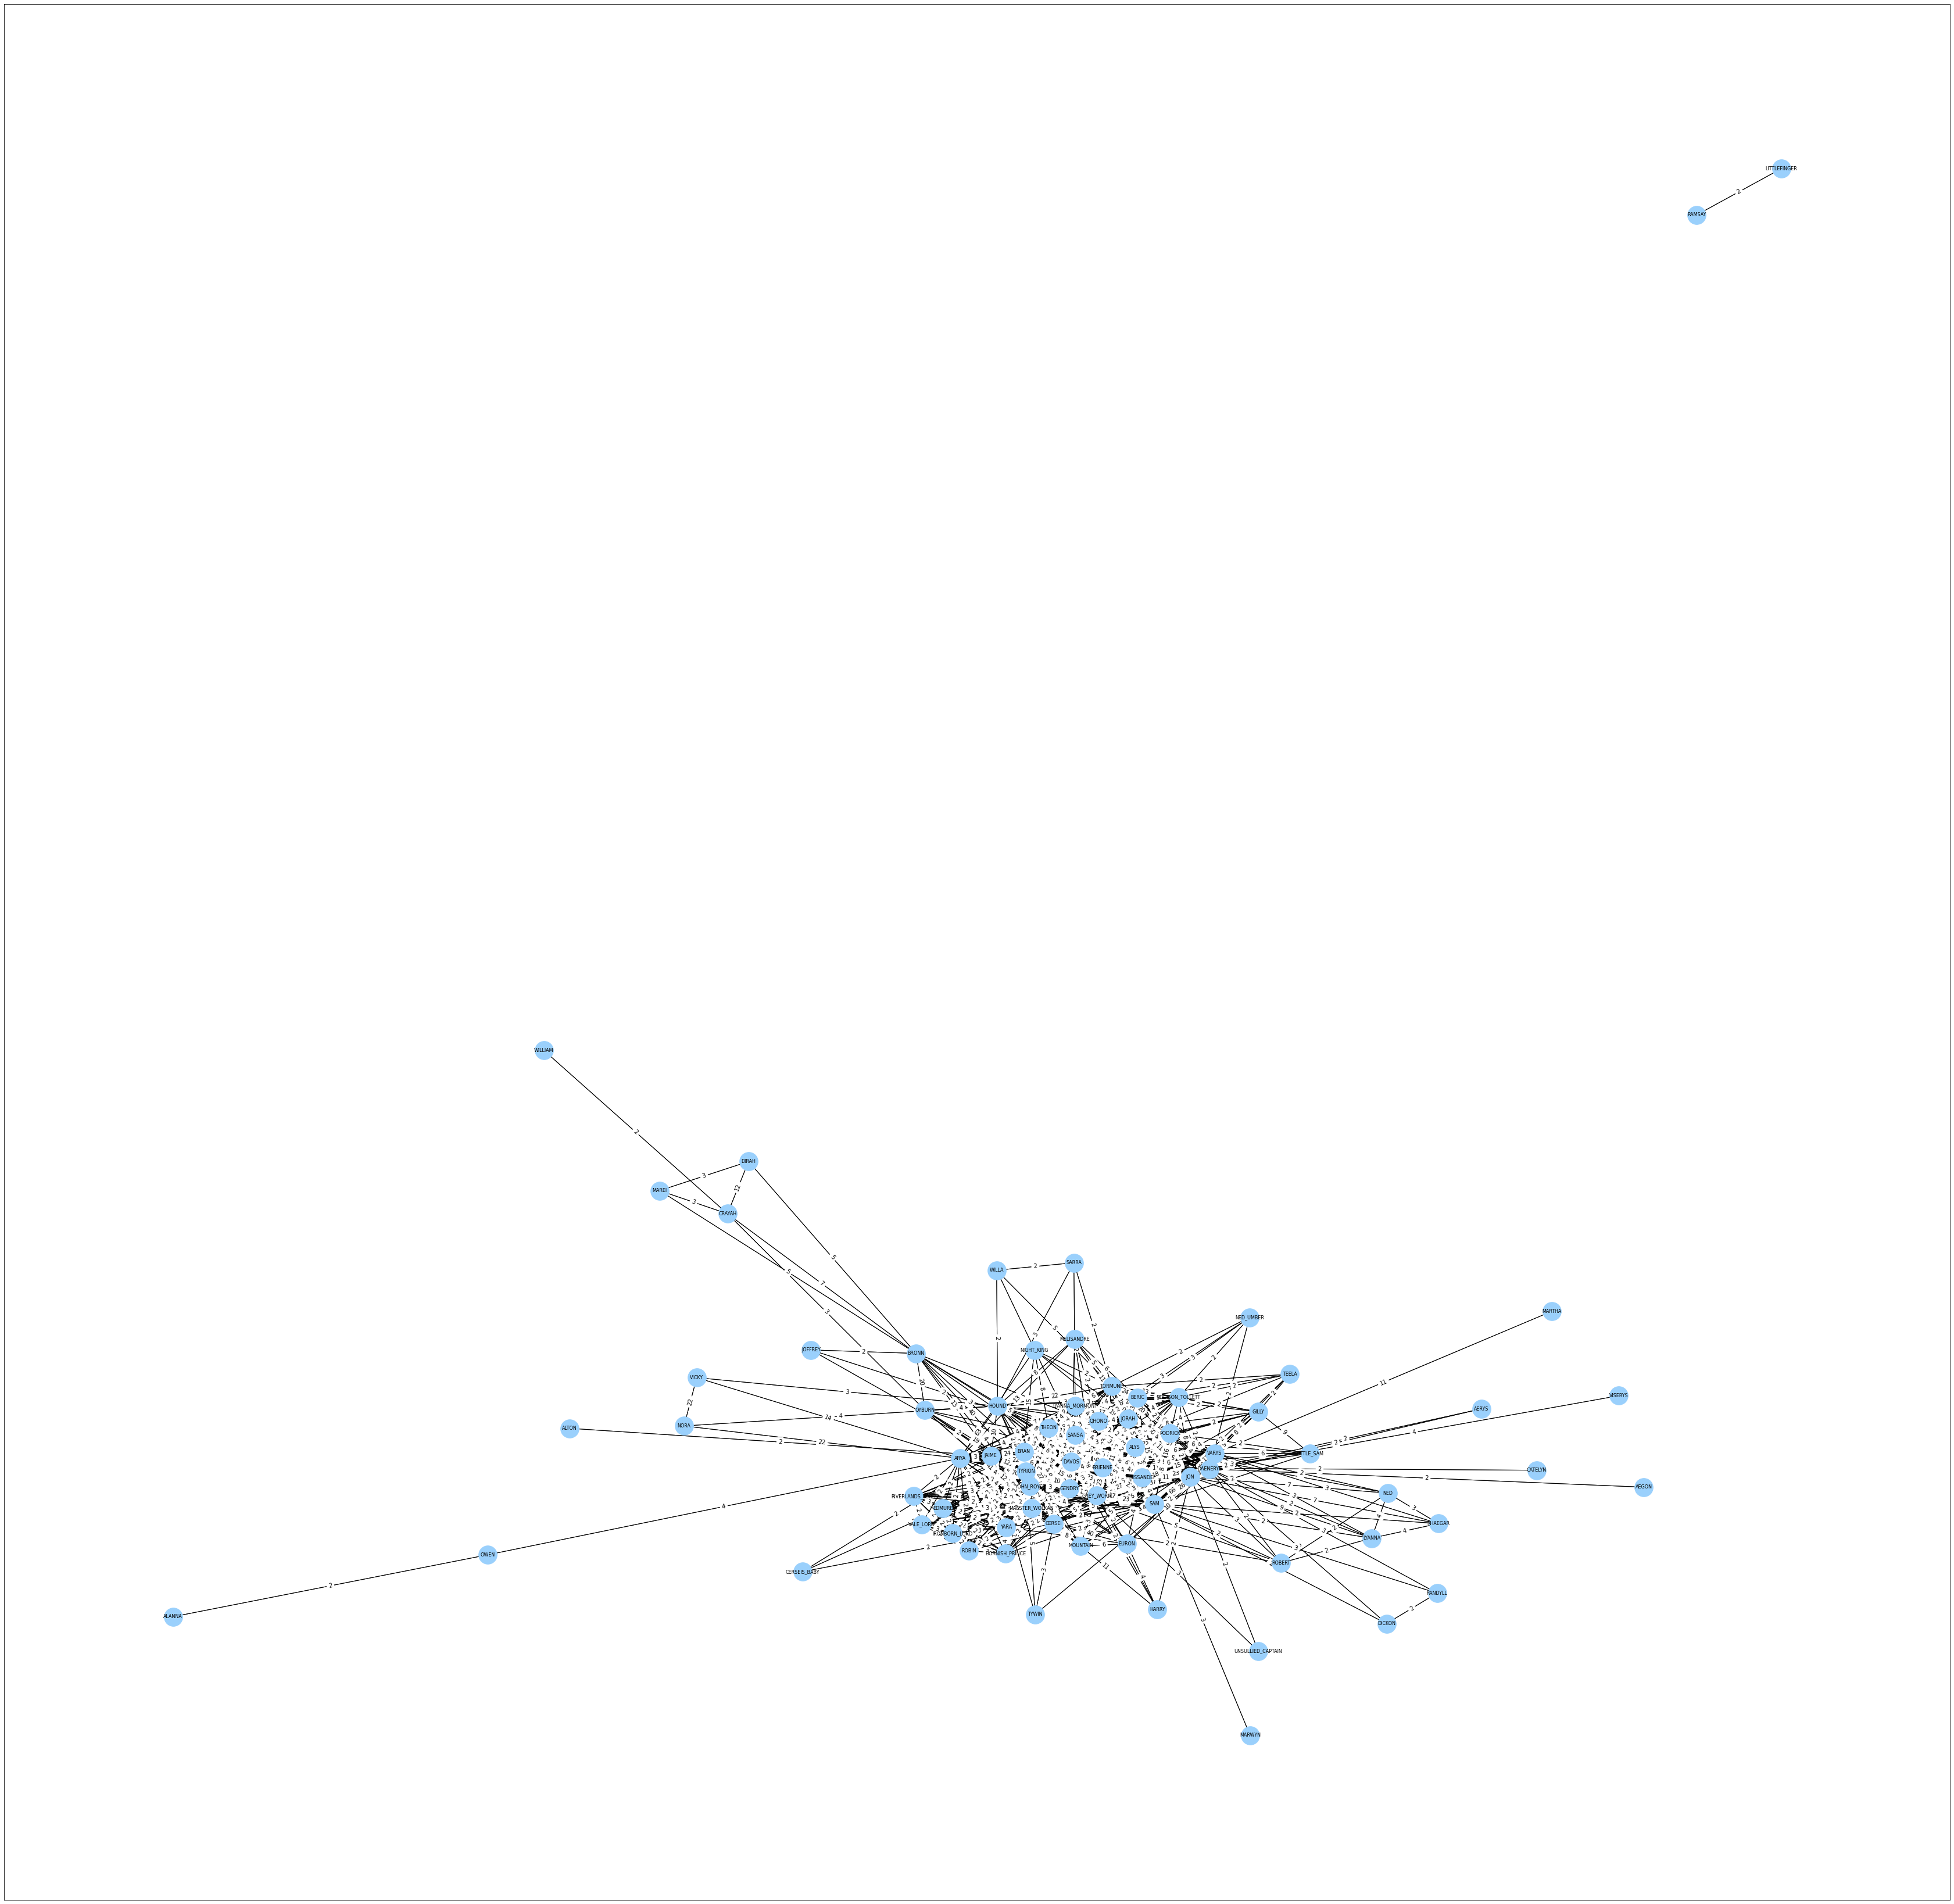

In [6]:
%matplotlib inline
plt.figure(3, figsize=(60,60))
pos = nx.spring_layout(G)

nx.draw_networkx(G,pos=pos, node_size = 1000, font_size=8, node_color="#9AD0FC")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'Weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [7]:
print("There are no self loops in the graph: ", len(list(nx.selfloop_edges(G))))
print("There are no isolates in the graph: ", len(list(nx.isolates(G))))

There are no self loops in the graph:  0
There are no isolates in the graph:  0


## Degree Centrality

In [8]:
deg_centrality = nx.degree_centrality(G)
print(sorted(deg_centrality.items(),key=lambda x:(x[1],x[0]),reverse=True))

[('SAM', 0.5753424657534246), ('TYRION', 0.5616438356164384), ('DAENERYS', 0.5616438356164384), ('SANSA', 0.547945205479452), ('ARYA', 0.5342465753424657), ('GREY_WORM', 0.5205479452054794), ('DAVOS', 0.5068493150684932), ('JON', 0.4931506849315068), ('BRIENNE', 0.4657534246575342), ('JAIME', 0.4383561643835616), ('BRAN', 0.4383561643835616), ('VARYS', 0.4246575342465753), ('GENDRY', 0.410958904109589), ('YOHN_ROYCE', 0.3972602739726027), ('TORMUND', 0.3972602739726027), ('BERIC', 0.3835616438356164), ('MISSANDEI', 0.3424657534246575), ('MAESTER_WOLKAN', 0.3424657534246575), ('JORAH', 0.3424657534246575), ('THEON', 0.3287671232876712), ('HOUND', 0.3287671232876712), ('QHONO', 0.3150684931506849), ('LYANNA_MORMONT', 0.3013698630136986), ('ALYS', 0.3013698630136986), ('PODRICK', 0.2876712328767123), ('YARA', 0.273972602739726), ('EDDISON_TOLLETT', 0.2465753424657534), ('CERSEI', 0.2465753424657534), ('VALE_LORD', 0.2328767123287671), ('ROBIN', 0.2328767123287671), ('RIVERLANDS_LORD', 0.2

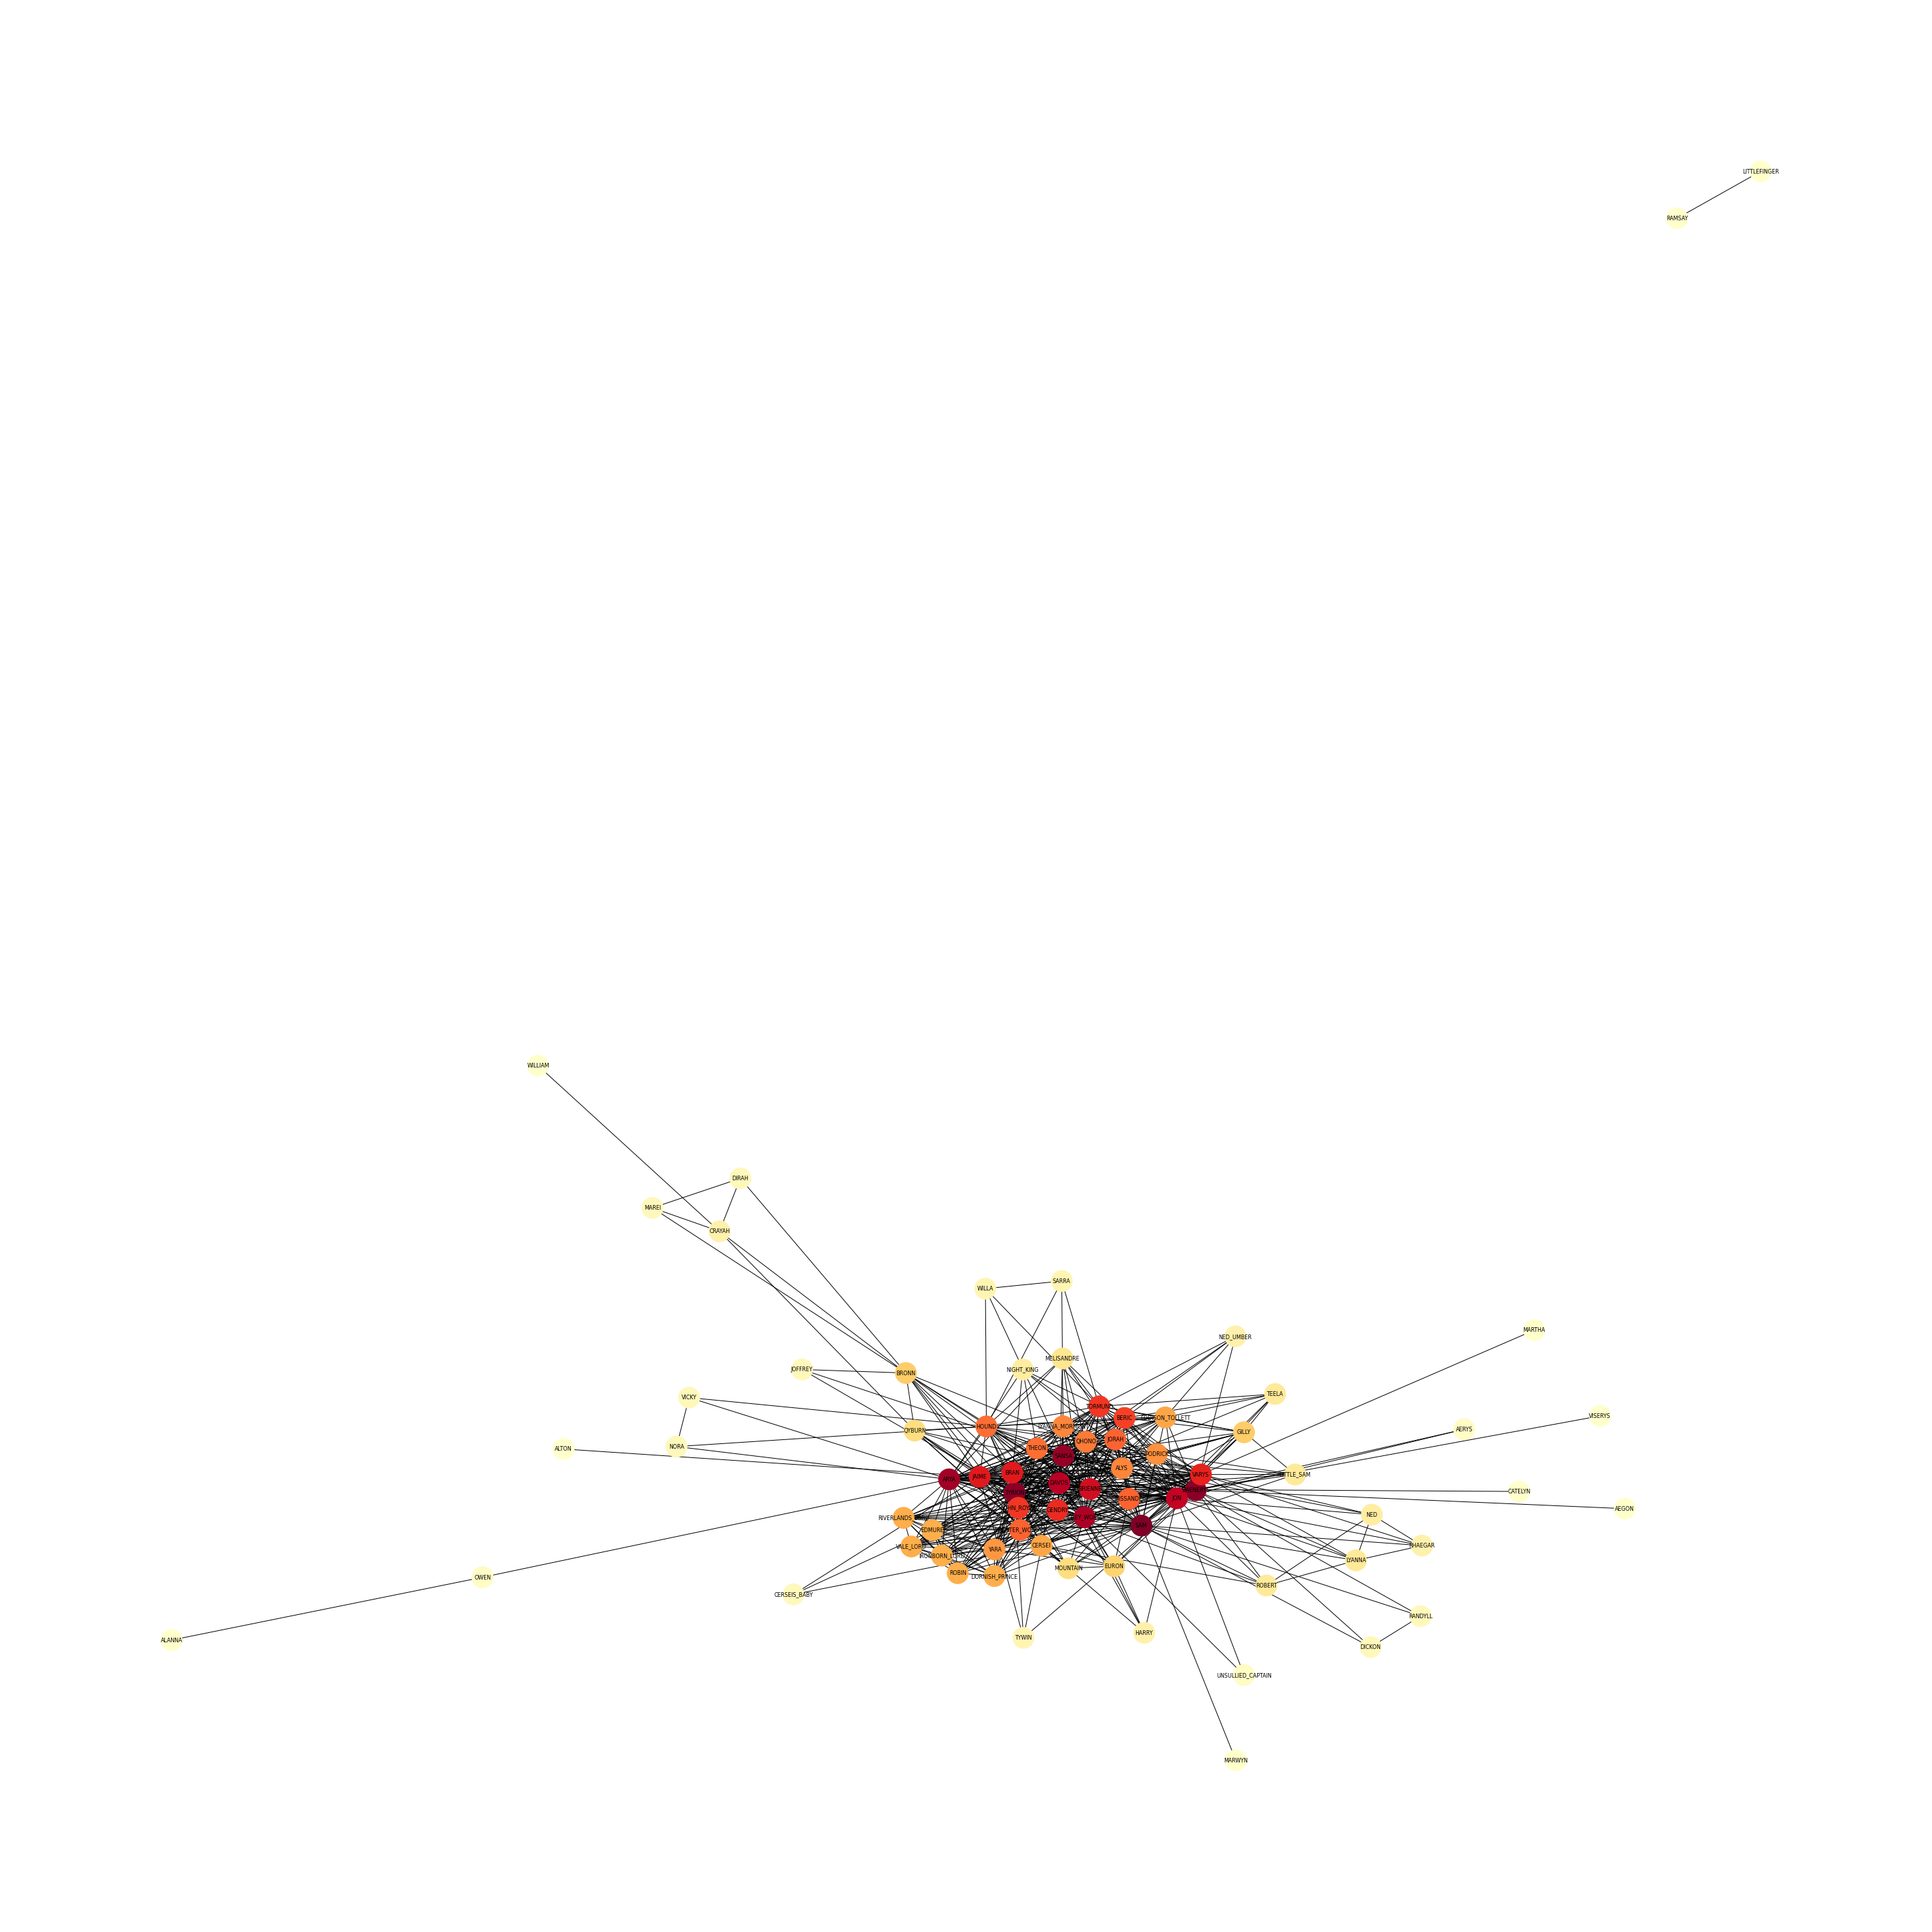

In [9]:
%matplotlib inline
plt.figure(3, figsize=(40,40))
nx.draw(G, cmap = plt.get_cmap('YlOrRd'), node_color = list(deg_centrality.values()), node_size=1000, pos=pos, with_labels=True, font_size=8)

## Closeness Measure

In [10]:
close_centrality = nx.closeness_centrality(G)
print(sorted(close_centrality.items(),key=lambda x:(x[1],x[0]),reverse=True))

[('SAM', 0.6770077894171367), ('TYRION', 0.670434898257747), ('DAENERYS', 0.670434898257747), ('DAVOS', 0.6453719114069901), ('SANSA', 0.6393962455606291), ('ARYA', 0.6393962455606291), ('GREY_WORM', 0.6277708592777086), ('BRIENNE', 0.6277708592777086), ('JON', 0.6165606653620352), ('JAIME', 0.6165606653620352), ('BRAN', 0.6165606653620352), ('VARYS', 0.5902119189790422), ('YOHN_ROYCE', 0.5802923909289743), ('TORMUND', 0.5802923909289743), ('GENDRY', 0.5802923909289743), ('BERIC', 0.5754566210045662), ('MISSANDEI', 0.5707007811615533), ('MAESTER_WOLKAN', 0.5614210936629914), ('JORAH', 0.5614210936629914), ('HOUND', 0.5614210936629914), ('THEON', 0.5568935041979673), ('QHONO', 0.5524383561643835), ('LYANNA_MORMONT', 0.5480539247662536), ('ALYS', 0.5480539247662536), ('PODRICK', 0.5437385395318736), ('CERSEI', 0.5394905821917808), ('YARA', 0.531190727081138), ('EDDISON_TOLLETT', 0.5271358360347171), ('VALE_LORD', 0.5077558420628526), ('ROBIN', 0.5077558420628526), ('RIVERLANDS_LORD', 0.5

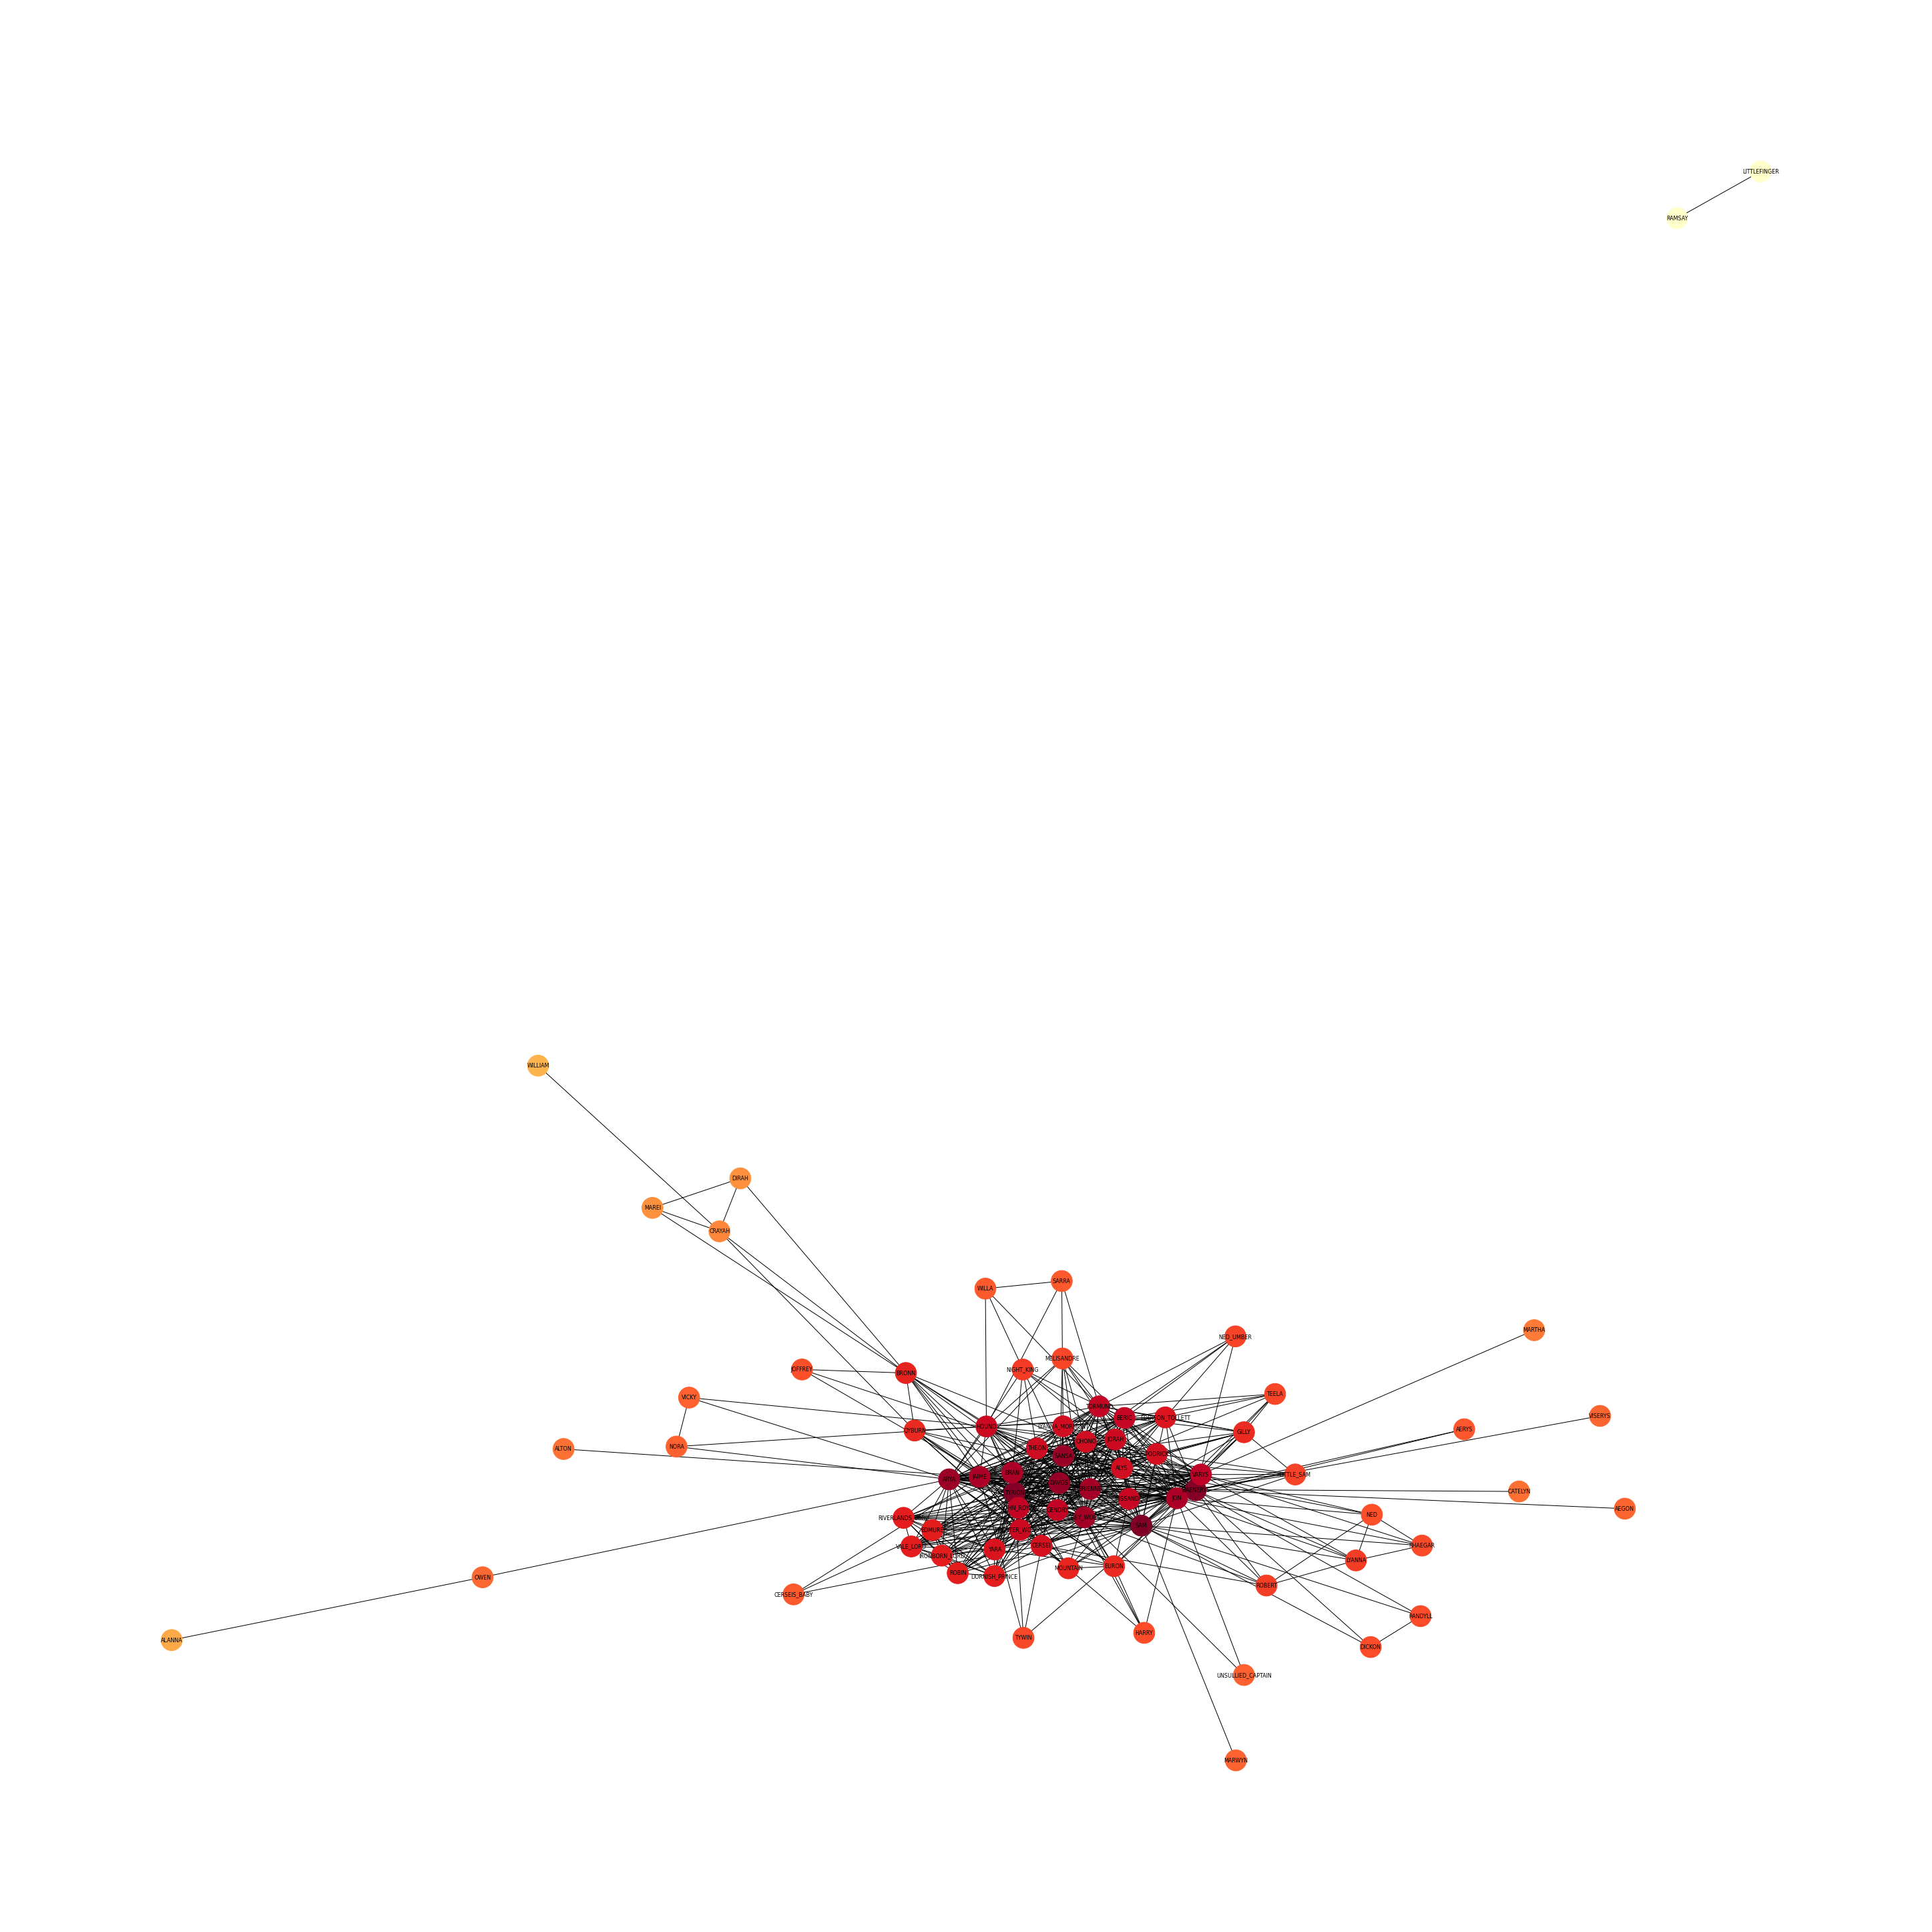

In [11]:
%matplotlib inline
plt.figure(3, figsize=(40,40))
nx.draw(G, cmap = plt.get_cmap('YlOrRd'), node_color = list(close_centrality.values()), node_size=1000, pos=pos, with_labels=True, font_size=8)

## Betweenness Centrality

In [12]:
bet_centrality = nx.betweenness_centrality(G, normalized = True, 
                                              endpoints = False)
print(sorted(bet_centrality.items(),key=lambda x:(x[1],x[0]),reverse=True))

[('DAENERYS', 0.13390159981644), ('SAM', 0.09913291196077363), ('ARYA', 0.09902087596468986), ('BRONN', 0.08240130694038411), ('TYRION', 0.06311681962029123), ('SANSA', 0.05999541827707134), ('JON', 0.05699511910149381), ('JAIME', 0.05232328599664347), ('VARYS', 0.04764748028683221), ('BRIENNE', 0.04046177950249275), ('HOUND', 0.038503334938426524), ('GREY_WORM', 0.03426335306856907), ('DAVOS', 0.03184838373830822), ('CRAYAH', 0.027606868216591553), ('OWEN', 0.02663622526636225), ('QYBURN', 0.022677705415505626), ('TORMUND', 0.022037445100388343), ('CERSEI', 0.018701339034959675), ('BRAN', 0.01566674884374333), ('BERIC', 0.010835578093726818), ('MISSANDEI', 0.008996782646211123), ('GENDRY', 0.008255146159397347), ('YOHN_ROYCE', 0.0041955104750019895), ('EDDISON_TOLLETT', 0.0037797821292701616), ('THEON', 0.003508433039389257), ('MAESTER_WOLKAN', 0.0030283283360511876), ('EURON', 0.002876622458555774), ('PODRICK', 0.0026772451957007295), ('JORAH', 0.002419697413796966), ('YARA', 0.00236

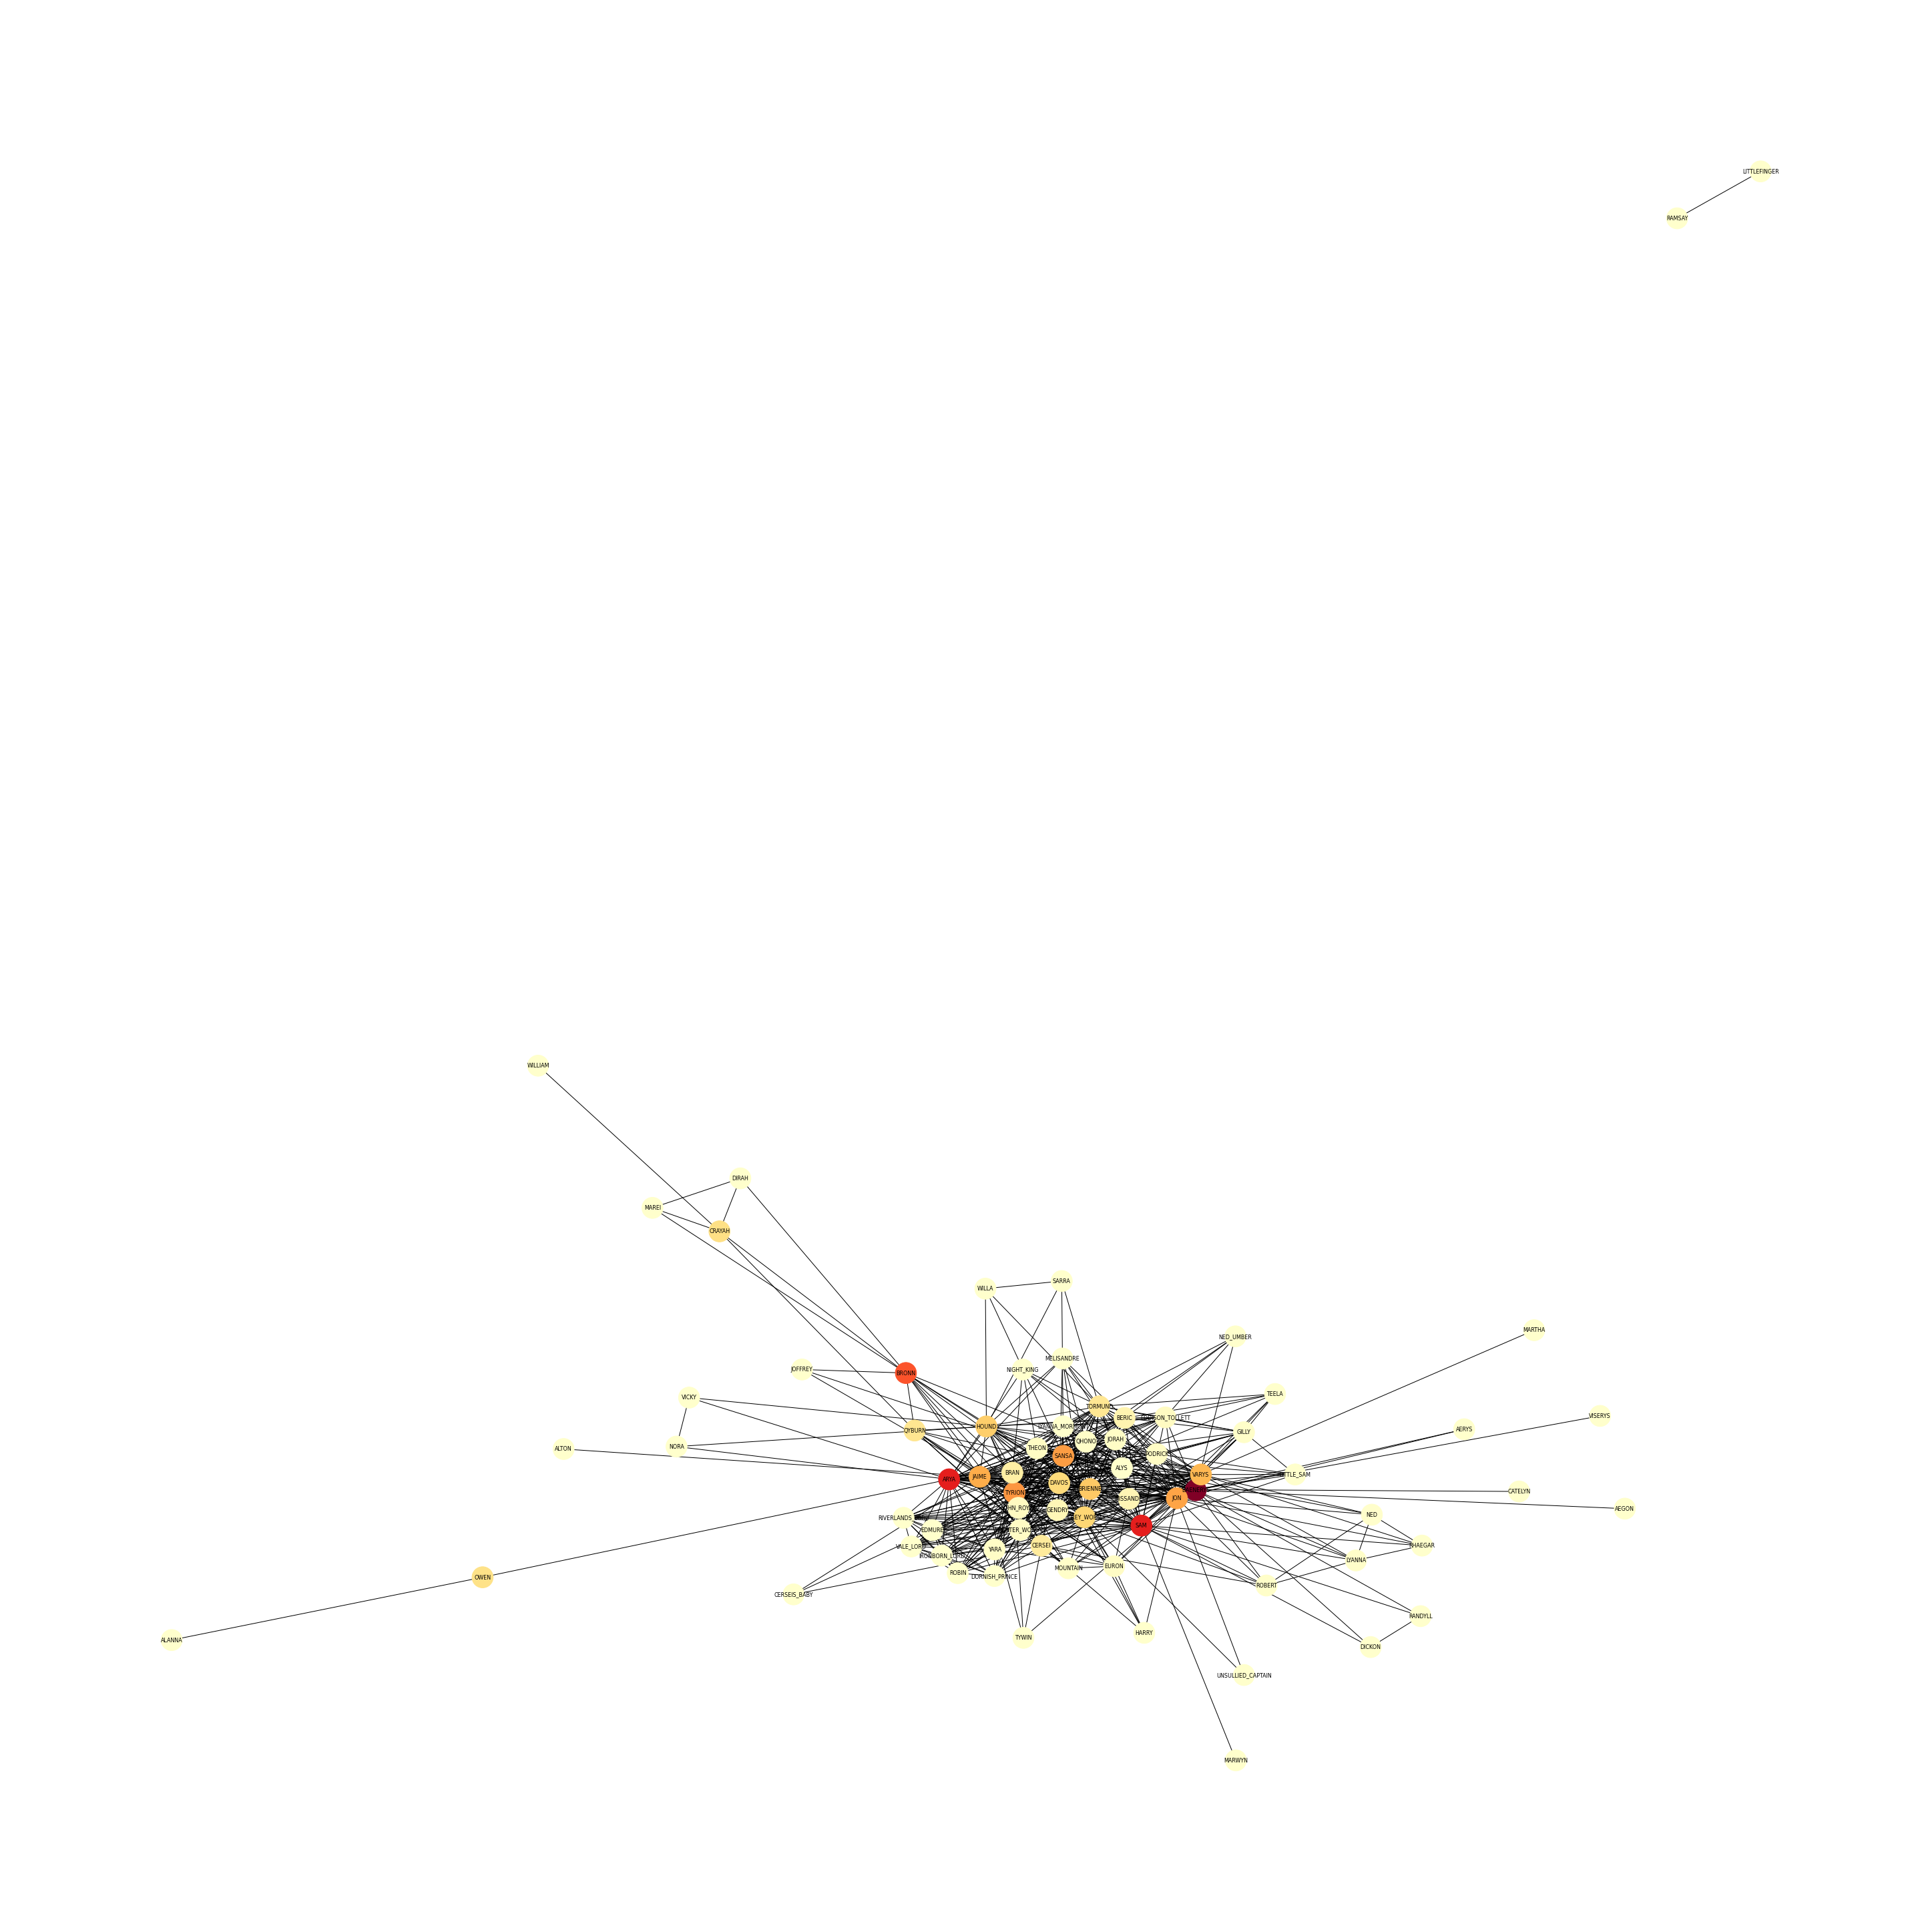

In [13]:
%matplotlib inline
plt.figure(3, figsize=(40,40))
nx.draw(G, cmap = plt.get_cmap('YlOrRd'), node_color = list(bet_centrality.values()), node_size=1000, pos=pos, with_labels=True, font_size=8)

## Page Rank Centrality

In [14]:
pr = nx.pagerank(G, alpha = 0.8)
print(sorted(pr.items(),key=lambda x:(x[1],x[0]),reverse=True))

[('DAENERYS', 0.037638776100681656), ('SAM', 0.034227374690914254), ('ARYA', 0.031662406377089225), ('TYRION', 0.031040660831417568), ('SANSA', 0.030190829897070184), ('JON', 0.029306079044454925), ('GREY_WORM', 0.027940804715776105), ('DAVOS', 0.026616803495100802), ('JAIME', 0.02649307929549335), ('BRIENNE', 0.026006692963276602), ('VARYS', 0.025621227068720942), ('BRAN', 0.02291068564837874), ('TORMUND', 0.02244069329163112), ('GENDRY', 0.021448670461134134), ('HOUND', 0.02112138524250724), ('BERIC', 0.021011937458083912), ('YOHN_ROYCE', 0.02044121770487557), ('MISSANDEI', 0.019044828102822837), ('JORAH', 0.018320426858713625), ('MAESTER_WOLKAN', 0.018032030848196254), ('THEON', 0.01780618213947836), ('QHONO', 0.016932278889388048), ('CERSEI', 0.016816422672461286), ('LYANNA_MORMONT', 0.01623899843514452), ('BRONN', 0.01623547076681466), ('ALYS', 0.016171744143478), ('PODRICK', 0.016058104949156805), ('YARA', 0.014991011865070876), ('EDDISON_TOLLETT', 0.014551242845878255), ('RAMSAY

## Local Clustering Co-efficient

In [15]:
print(sorted(nx.clustering(G).items(),key=lambda x:(x[1],x[0]),reverse=True))

[('WILLA', 1.0), ('VICKY', 1.0), ('VALE_LORD', 1.0), ('UNSULLIED_CAPTAIN', 1.0), ('TYWIN', 1.0), ('TEELA', 1.0), ('SARRA', 1.0), ('ROBIN', 1.0), ('RIVERLANDS_LORD', 1.0), ('RANDYLL', 1.0), ('NORA', 1.0), ('NIGHT_KING', 1.0), ('NED_UMBER', 1.0), ('MAREI', 1.0), ('LITTLE_SAM', 1.0), ('IRONBORN_LORD', 1.0), ('EDMURE', 1.0), ('DORNISH_PRINCE', 1.0), ('DIRAH', 1.0), ('DICKON', 1.0), ('CERSEIS_BABY', 1.0), ('AERYS', 1.0), ('MELISANDRE', 0.9642857142857143), ('ALYS', 0.9567099567099567), ('LYANNA_MORMONT', 0.9393939393939394), ('RHAEGAR', 0.9), ('QHONO', 0.8972332015810277), ('JORAH', 0.8533333333333334), ('YARA', 0.8526315789473684), ('MOUNTAIN', 0.8444444444444444), ('PODRICK', 0.8380952380952381), ('THEON', 0.8079710144927537), ('MAESTER_WOLKAN', 0.8066666666666666), ('EDDISON_TOLLETT', 0.7843137254901961), ('GILLY', 0.782051282051282), ('YOHN_ROYCE', 0.7733990147783252), ('LYANNA', 0.7619047619047619), ('HARRY', 0.7), ('GENDRY', 0.6988505747126437), ('BERIC', 0.6957671957671958), ('BRAN',

In [16]:
# Local CLustering Co-efficient of Protagonists
protagonists = []
local_clustering = nx.clustering(G)

for i in protagonists:
    print(i,local_clustering[i])

## Spectral Clustering

In [26]:
# Class to perform spectral clustering for k clusters, given k

from matplotlib import patches

class SpectralClustering:
    
    def __init__(self, G):
        # Initialize the graph, nodes and the normalized Laplacian

        self.graph = G
        self.normalized_laplacian = nx.linalg.normalized_laplacian_matrix(G).toarray()
        self.nodes = G.nodes()

    def compute_eigenspace(self):
        # Compute the eigenvalues and the eigenvectors using Numpy and sort them in ascending order 

        eigenvalues, eigenvectors = np.linalg.eig(self.normalized_laplacian)

        sort_index = np.argsort(eigenvalues) # Returns the list of indices that would sort the array
        sorted_eigenvectors = eigenvectors[:, sort_index]

        return sorted_eigenvectors

    def fit(self, k):
        """
        Step 1: Extract the k eigen vectors and stack them vertically to form a matrix (i.e each vector is a column)
        Step 2: Every row of this matrix represents the features of the respective nodes of the graph
        Step 3: Perform K-Means clustering on this dataset to identify k clusters

        """
        eigenvectors = self.compute_eigenspace()
        k_eigenvectors = np.array(eigenvectors)[:,:k]
        dataset = pd.DataFrame(k_eigenvectors, index=self.nodes)

        # print(dataset)

        k_means_clusters = KMeans(n_clusters = k, random_state=42)
        self.clusters = k_means_clusters.fit(k_eigenvectors)
        
    def predict_labels(self):
        # Returns the labels 
        return self.clusters.labels_

    def assign_labels(self, labels):
        # Helper to assign the labels as node attributes
        for i,node in enumerate(self.graph.nodes()):
            self.graph.nodes[node]['label'] = labels[i]

    def plot_graph(self, n_clusters, title='Graph after Spectral Clustering'):
        # Plots the graph 

        labels = self.clusters.labels_
        self.assign_labels(labels)

        colour_list = ['blue','green','red','yellow','cyan', 'magenta','lightblue','grey']
        sampled_colours = dict(zip(set(labels),random.sample(colour_list, n_clusters)))

        legend_handles = []
        for label, color in sampled_colours.items():
            colour_handle = patches.Patch(color=color, label=label)
            legend_handles.append(colour_handle)

        colours = [sampled_colours[i] for i in labels]

        pos_fr = nx.fruchterman_reingold_layout(self.graph)
        plt.figure(figsize=(8,8))
        plt.title(title)
        plt.legend(handles=legend_handles)
        nx.draw(self.graph, pos=pos_fr, node_size=500, node_color=colours, with_labels=True)
        plt.show()

In [27]:
# !pip uninstall torch-geometric

In [28]:
# !pip install pyg-nightly

<class 'networkx.utils.decorators.argmap'> compilation 24:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


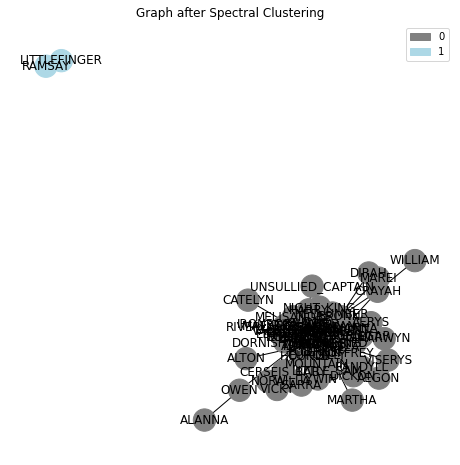

In [29]:
# Performing Spectral Clustering on the graph
from sklearn.cluster import KMeans

k = 2
SpecClust = SpectralClustering(G)
SpecClust.fit(k)
clustering_labels = SpecClust.predict_labels()
# print(labels)

for i,node in enumerate(G.nodes()):
    G.nodes[node]['label'] = clustering_labels[i]

colour_map = ['']*len(clustering_labels)
for i, label in enumerate(clustering_labels):
    if label == 0:
        colour_map[i] = 'lightgreen'
    else:
        colour_map[i] = "red"

# nx.draw(G, with_labels=True, node_color=colour_map)
SpecClust.plot_graph(k, title="Graph after Spectral Clustering")

In [ ]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
n = G.number_of_nodes()
m = G.number_of_edges()
print("Number of nodes =", str(n))
print("Number of edges =", str(m))
print("Number of connected components =", str(nx.number_connected_components(G)))

In [ ]:
# take a random sample of edges

proportion_edges = 0.25
edge_subset = random.sample(G.edges(), int(proportion_edges * G.number_of_edges()))

# remove some edges. the goal is to try and repredict these edges, and measure how close the prediction is to the original.

G_train = G.copy()
G_train.remove_edges_from(edge_subset)

In [ ]:
%matplotlib inline
plt.figure(3, figsize=(50,50))
pos = nx.spring_layout(G_train)

nx.draw_networkx(G_train,pos=pos, node_size = 1000, font_size=8, node_color="#BAABDA")
nx.draw_networkx_edges(G_train, pos=pos)
edge_labels = nx.get_edge_attributes(G_train, 'Weight')
nx.draw_networkx_edge_labels(G_train, pos=pos, edge_labels=edge_labels)
plt.show()

In [ ]:
edge_subset_size = len(list(edge_subset))
print("Deleted edges =", str(edge_subset_size))
print("Remaining edges =", str(m - edge_subset_size))

# just printing the edge_subset.
print(edge_subset)

## Jaccard Co-efficient

In [ ]:
# calculating jaccard coefficient for all the node pairs in G_karate_train.

prediction_jaccard = list(nx.jaccard_coefficient(G_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard])

In [ ]:
# binary classification here. taking various thresholds for the jaccard coefficient.
# calculating fpr, tpr, and auc values for various thresholds of the jaccard coefficient.

fpr_jaccard, tpr_jaccard, thresholds_jaccard = roc_curve(label_jaccard, score_jaccard)
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)

## Adamic-Adar Co-efficent

In [ ]:
prediction_adamic = list(nx.adamic_adar_index(G_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_adamic])

In [ ]:
fpr_adamic, tpr_adamic, thresholds_adamic = roc_curve(label_adamic, score_adamic)
auc_adamic = roc_auc_score(label_adamic, score_adamic)

## Preferential Attachement

In [ ]:
prediction_pref = list(nx.preferential_attachment(G_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_pref])

In [ ]:
fpr_pref, tpr_pref, thresholds_pref = roc_curve(label_pref, score_pref)
auc_pref = roc_auc_score(label_pref, score_pref)

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(fpr_jaccard, tpr_jaccard, label='Jaccard coefficient - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Preferential attachment - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC AUC Curve")
plt.legend(loc='lower right')
plt.show()

In [ ]:
# however, in this particular case, it is clear from the auc, that adamic adar performs the best.
# now, find the threshold value at which adamic adar performs the best.

optimal_idx = np.argmax(tpr_adamic - fpr_adamic)
optimal_threshold = thresholds_adamic[optimal_idx]
print("Optimal threshold =", optimal_threshold)

# this is the threshold value above which a link will be classified as existant, and below which a link will be classified as non-existant.

Obtained good accuracy of prediction with link promixity measures hence we are not using top-k approach